# ANALYSE THE DOW JONES FLUCTUATIONS DURING THE ELECTION YEARS

### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

### Import the created table and accomodate it for the visual analyzation libraries

In [2]:
analysis = pd.read_csv("analysis.csv")

In [3]:
def quitter2(x):
    if x.split(" ")[0] == "":
        return x.split(" ")[1]
    else:
        return x

In [4]:
analysis["Presidents Party"] = analysis["Presidents Party"].apply(quitter2)

### Proceed to create the interest analysis of the information

Average Fluctuations depending on the elected presidents party

In [5]:
DemocratMean = analysis[analysis["Presidents Party"]=="Democrat"]["Next years Dow Jones Fluctuation (%)"].mean()
RepublicanMean = analysis[analysis["Presidents Party"]=="Republican"]["Next years Dow Jones Fluctuation (%)"].mean()

In [6]:
Means = pd.DataFrame([10.023846153846154,2.6884615384615387])

In [7]:
Means = Means.rename(columns={0:"Dow Jones Average Fluctuation (%)"})

In [8]:
Means = Means.rename(index={0:"Democrat Elected",1:"Republican Elected"})

In [9]:
#Means.to_csv("Means.csv")

In [10]:
means = Means.T

In [11]:
means1 = means.rename(index={"Dow Jones Average Fluctuation (%)":""})

Text(0.5, 1.0, 'Dow Jones Average Fluctuations the year after elections')

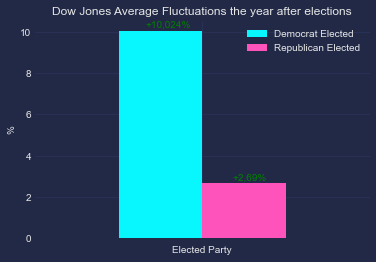

In [12]:
plt.style.use("cyberpunk")
means1.plot.bar()
plt.annotate("+10,024%",xy=(-0.17,10.2),color="green")
plt.annotate("+2,69%",xy=(0.09,2.8),color="green")
plt.xlabel("Elected Party")
plt.ylabel("%")
plt.title("Dow Jones Average Fluctuations the year after elections")
#plt.savefig("AverageFluctuations.png")

Historical depending on the Party

In [13]:
RepublicanHist = analysis[analysis["Presidents Party"] == "Republican"]
DemocratHist = analysis[analysis["Presidents Party"] == "Democrat"]

In [14]:
#RepublicanHist.to_csv("RepublicanHist.csv")
#DemocratHist.to_csv("DemocratHist.csv")

In [15]:
RepublicanHistory = RepublicanHist.set_index("Year of elections")
RepublicanHistory = RepublicanHistory.sort_values(by="Year of elections", ascending=True)
RepublicanHistory = RepublicanHistory.rename(columns={"Next years Dow Jones Fluctuation (%)":"Fluctuation"})

In [16]:
DemocratHistory = DemocratHist.set_index("Year of elections")
DemocratHistory = DemocratHistory.sort_values(by="Year of elections", ascending=True)
DemocratHistory = DemocratHistory.rename(columns={"Next years Dow Jones Fluctuation (%)":"Fluctuation"})

Text(3, 25, 'Crash of 29')

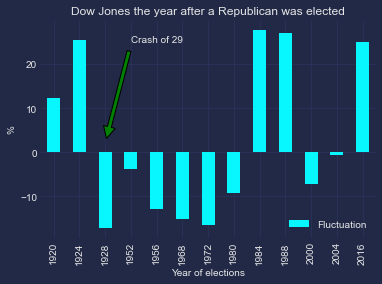

In [17]:
plt.style.use("cyberpunk")
RepublicanHistory.plot.bar()
plt.title("Dow Jones the year after a Republican was elected")
plt.ylabel("%")
plt.annotate("Crash of 29", xy=(2,2),xytext=(3,25), arrowprops=dict(facecolor="green", shrink=0.05))
#plt.savefig("Republican.png")

Text(0, 0.5, '%')

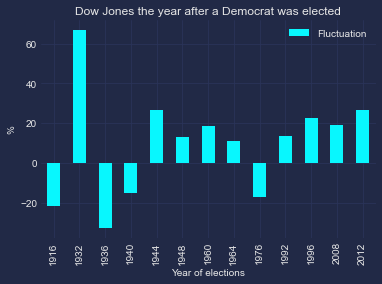

In [18]:
DemocratHistory.plot.bar()
plt.title("Dow Jones the year after a Democrat was elected")
plt.ylabel("%")
#plt.savefig("Democrat.png")

Quantity of positive and negative fluctuations

In [19]:
def binarial(x):
    if x > 0:
        return 1
    if x < 0:
        return 0

In [20]:
analysis["Binarial"] = analysis["Next years Dow Jones Fluctuation (%)"].apply(binarial)

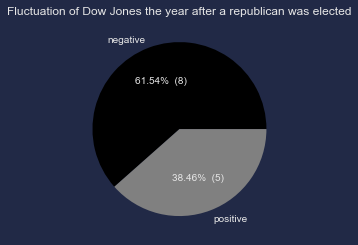

In [21]:
CakeRepublican = analysis[analysis["Presidents Party"]=="Republican"]["Binarial"].value_counts()
colors = ["black","grey"]
data = ["negative","positive"]
def make_autopct(CakeRepublican):
       def my_autopct(pct):
           total = sum(CakeRepublican)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct
plt.pie(CakeRepublican, labels=data, colors=colors, autopct=make_autopct(CakeRepublican))

plt.title("Fluctuation of Dow Jones the year after a republican was elected")
#plt.savefig("CakeRepublican.png")

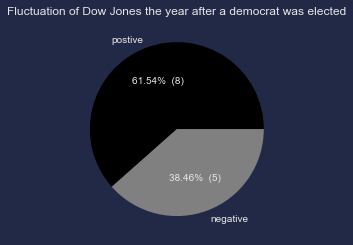

In [22]:
CakeDemocrat = analysis[analysis["Presidents Party"]=="Democrat"]["Binarial"].value_counts()
data = ["postive","negative"]
colors = ["black","grey"]
def make_autopct(CakeDemocrat):
       def my_autopct(pct):
           total = sum(CakeDemocrat)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct
plt.pie(CakeRepublican, labels=data, colors=colors, autopct=make_autopct(CakeDemocrat))
plt.title("Fluctuation of Dow Jones the year after a democrat was elected")
#plt.savefig("CakeDemocrat.png")